In [25]:
import pandas as pd

import matplotlib.pyplot as plt

<h>

<h1>1. Define the question:</h1>

Can I use this dataset to find movies to watch by specifying a minimum rating, release year, etc?

<h1>2. Read in the Data:</h1>

In [26]:
movies = pd.read_csv("Movies.csv")

In [27]:
print(movies)

        id                       title  \
0        1    The Shawshank Redemption   
1        2               The Godfather   
2        3       The Godfather Part II   
3        4            Schindler's List   
4        5                12 Angry Men   
...    ...                         ...   
9713  9714           Alone in the Dark   
9714  9715              Disaster Movie   
9715  9716           House of the Dead   
9716  9717        Dragonball Evolution   
9717  9718  Birdemic: Shock and Terror   

                                                 genres language  user_score  \
0                                          Drama, Crime       en        8.70   
1                                          Drama, Crime       en        8.70   
2                                          Drama, Crime       en        8.60   
3                                   Drama, History, War       en        8.60   
4                                                 Drama       en        8.50   
...            

In [28]:
movies.head()

,id,title,genres,language,user_score,runtime_hour,runtime_min,release_date,vote_count
0,1,The Shawshank Redemption,"Drama, Crime",en,8.70,2,22,1994-09-23,27070
1,2,The Godfather,"Drama, Crime",en,8.70,2,55,1972-03-14,20563
2,3,The Godfather Part II,"Drama, Crime",en,8.60,3,22,1974-12-20,12403
3,4,Schindler's List,"Drama, History, War",en,8.60,3,15,1993-12-15,15810
4,5,12 Angry Men,Drama,en,8.50,1,37,1957-04-10,8611


In [29]:
movies.tail()

,id,title,genres,language,user_score,runtime_hour,runtime_min,release_date,vote_count
9713,9714,Alone in the Dark,"Action, Fantasy, Horror",en,3.30,1,38,2005-01-28,602
9714,9715,Disaster Movie,Comedy,en,3.20,1,27,2008-08-29,1021
9715,9716,House of the Dead,"Horror, Action, Thriller",en,3.10,1,30,2003-04-11,384
9716,9717,Dragonball Evolution,"Action, Adventure, Fantasy, Science Fiction, T...",en,2.90,1,25,2009-03-12,2028
9717,9718,Birdemic: Shock and Terror,"Romance, Horror, Thriller",en,2.20,1,33,2010-02-27,334


<h1>3. Data Cleaning:</h1>

In [30]:
movies.shape

(9718, 9)

<h2>Address missing values:

In [31]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9718 entries, 0 to 9717
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            9718 non-null   int64  
 1   title         9718 non-null   object 
 2   genres        9718 non-null   object 
 3   language      9718 non-null   object 
 4   user_score    9718 non-null   float64
 5   runtime_hour  9718 non-null   int64  
 6   runtime_min   9718 non-null   int64  
 7   release_date  9718 non-null   object 
 8   vote_count    9718 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 683.4+ KB


<h3>Are there any null values? No.

In [32]:
print(movies.isnull().any().any())

False


<h4>Look at the columns and remove any that are unnecessary, change to title case, and replace underscores with spaces :

In [33]:
movies.columns

Index(['id', 'title', 'genres', 'language', 'user_score', 'runtime_hour',
       'runtime_min', 'release_date', 'vote_count'],
      dtype='object')

In [34]:
# Create list of columns to drop:
cols_to_drop = ['id', 'vote_count', 'runtime_hour', 'runtime_min']

In [35]:
# Use the above list to drop the columns:
movies = movies.drop(columns= cols_to_drop)
# Look at the dataframe without the excess columns:
movies.head(10)

,title,genres,language,user_score,release_date
0,The Shawshank Redemption,"Drama, Crime",en,8.70,1994-09-23
1,The Godfather,"Drama, Crime",en,8.70,1972-03-14
2,The Godfather Part II,"Drama, Crime",en,8.60,1974-12-20
3,Schindler's List,"Drama, History, War",en,8.60,1993-12-15
4,12 Angry Men,Drama,en,8.50,1957-04-10
5,Spirited Away,"Animation, Family, Fantasy",ja,8.50,2001-07-20
6,The Wild Robot,"Animation, Science Fiction, Family",en,8.50,2024-09-12
7,Dilwale Dulhania Le Jayenge,"Comedy, Drama, Romance",hi,8.50,1995-10-20
8,The Dark Knight,"Drama, Action, Crime, Thriller",en,8.50,2008-07-16
9,The Green Mile,"Fantasy, Drama, Crime",en,8.50,1999-12-10


In [36]:
# Change columns to title case
movies.columns = movies.columns.str.title()
movies.head()

,Title,Genres,Language,User_Score,Release_Date
0,The Shawshank Redemption,"Drama, Crime",en,8.70,1994-09-23
1,The Godfather,"Drama, Crime",en,8.70,1972-03-14
2,The Godfather Part II,"Drama, Crime",en,8.60,1974-12-20
3,Schindler's List,"Drama, History, War",en,8.60,1993-12-15
4,12 Angry Men,Drama,en,8.50,1957-04-10


In [37]:
#Remove underscores
movies.columns = movies.columns.str.strip().str.replace('_', ' ')
movies.head()

,Title,Genres,Language,User Score,Release Date
0,The Shawshank Redemption,"Drama, Crime",en,8.70,1994-09-23
1,The Godfather,"Drama, Crime",en,8.70,1972-03-14
2,The Godfather Part II,"Drama, Crime",en,8.60,1974-12-20
3,Schindler's List,"Drama, History, War",en,8.60,1993-12-15
4,12 Angry Men,Drama,en,8.50,1957-04-10


<h3>Convert columns to proper data types:

In [38]:
movies.dtypes

Title            object
Genres           object
Language         object
User Score      float64
Release Date     object
dtype: object

In [39]:
#convert Release Date column to datetime
movies['Release Date'] = pd.to_datetime(movies['Release Date'], format='%Y-%m-%d')

movies.info()
movies.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9718 entries, 0 to 9717
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Title         9718 non-null   object        
 1   Genres        9718 non-null   object        
 2   Language      9718 non-null   object        
 3   User Score    9718 non-null   float64       
 4   Release Date  9718 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 379.7+ KB


,Title,Genres,Language,User Score,Release Date
0,The Shawshank Redemption,"Drama, Crime",en,8.70,1994-09-23
1,The Godfather,"Drama, Crime",en,8.70,1972-03-14
2,The Godfather Part II,"Drama, Crime",en,8.60,1974-12-20
3,Schindler's List,"Drama, History, War",en,8.60,1993-12-15
4,12 Angry Men,Drama,en,8.50,1957-04-10


<h3>Engineer a new feature:

In [40]:
#Create a Release Year column from the Release date column

movies['Release Year'] = movies['Release Date'].dt.year

movies.head()


,Title,Genres,Language,User Score,Release Date,Release Year
0,The Shawshank Redemption,"Drama, Crime",en,8.70,1994-09-23,1994
1,The Godfather,"Drama, Crime",en,8.70,1972-03-14,1972
2,The Godfather Part II,"Drama, Crime",en,8.60,1974-12-20,1974
3,Schindler's List,"Drama, History, War",en,8.60,1993-12-15,1993
4,12 Angry Men,Drama,en,8.50,1957-04-10,1957


In [41]:
# Filter for movies made after a certain year and above a certain score

year_filter = 2000
score_filter = 8.5
filtered_movies = movies[(movies['Release Year'] >= year_filter) & (movies['User Score'] >= score_filter)]

filtered_movies

# Print a string displaying the requested information 
print(f'Here are the movies from', year_filter, 'or later with a user score of', score_filter, 'or higher:\n')
filtered_movies



Here are the movies from 2000 or later with a user score of 8.5 or higher:



,Title,Genres,Language,User Score,Release Date,Release Year
5,Spirited Away,"Animation, Family, Fantasy",ja,8.50,2001-07-20,2001
6,The Wild Robot,"Animation, Science Fiction, Family",en,8.50,2024-09-12,2024
8,The Dark Knight,"Drama, Action, Crime, Thriller",en,8.50,2008-07-16,2008
10,Parasite,"Comedy, Thriller, Drama",ko,8.50,2019-05-30,2019
12,Your Name.,"Animation, Romance, Drama",ja,8.50,2016-08-26,2016
13,The Lord of the Rings: The Return of the King,"Adventure, Fantasy, Action",en,8.50,2003-12-17,2003


<h1>4. Exploratory Data Analysis

In [42]:
movies['Language'].value_counts()

Language
en    7695
fr     630
it     349
ja     271
es     179
de      90
ko      84
zh      63
cn      52
ru      44
sv      36
da      31
pt      30
hi      28
no      22
pl      18
tr      11
th      11
fa      10
nl       9
fi       8
hu       6
id       5
sr       4
te       4
uk       3
el       3
cs       3
ar       2
is       2
sh       1
bn       1
et       1
bs       1
gl       1
ga       1
ro       1
ml       1
la       1
tn       1
he       1
km       1
eu       1
su       1
lt       1
Name: count, dtype: int64

<h3>Provide descriptive stats:

In [43]:
pd.set_option('display.float_format', '{:.2f}'.format)

movies.describe()




,User Score,Release Date,Release Year
count,9718.00,9718,9718.00
mean,6.63,2004-10-31 06:42:09.409343488,2004.29
min,2.20,1902-06-21 00:00:00,1902.00
25%,6.10,1997-12-19 00:00:00,1997.00
50%,6.70,2009-10-01 00:00:00,2009.00
75%,7.20,2016-12-21 00:00:00,2016.00
max,8.70,2024-10-24 00:00:00,2024.00
std,0.78,NaN,17.20


In [44]:
print(f'The mean user score is {movies["User Score"].mean()}')
print(f'The median user score is {movies["User Score"].median()}')
print(f'The minimum user score is {movies["User Score"].min()}')
print(f'The maximum user score is {movies["User Score"].max()}')

The mean user score is 6.6332681621732865
The median user score is 6.7
The minimum user score is 2.2
The maximum user score is 8.7


<h3>Data Visualization:</h3>

<h4>Plot of the languages of movies</h4>

<Axes: xlabel='Language'>

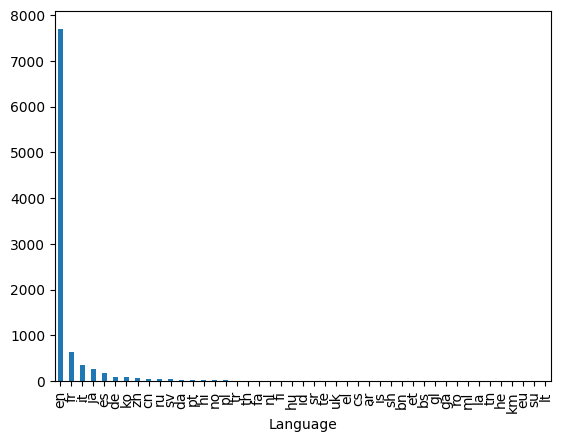

In [45]:
movies['Language'].value_counts().plot(kind='bar', rot=90)

<h4>Is there any correlation between the release year of movies and the scores?

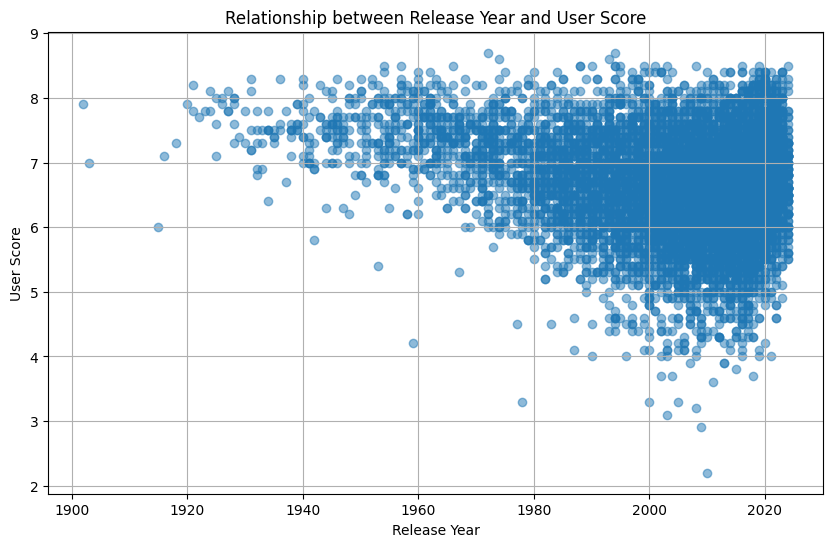

In [46]:
plt.figure(figsize=(10, 6))
plt.scatter(movies['Release Year'], movies['User Score'], alpha=0.5)
plt.title('Relationship between Release Year and User Score')
plt.xlabel('Release Year')
plt.ylabel('User Score')
plt.grid(True)
plt.show()




<h4>What is the trend for movie releases per year?</h4>

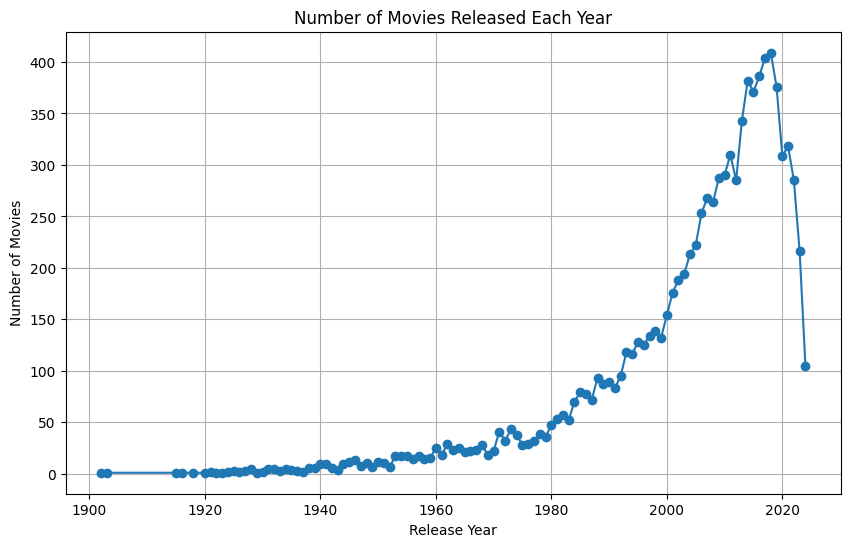

In [47]:
#Count the number of movies released each year
movies_per_year = movies['Release Year'].value_counts().sort_index()

# Create a line graph
plt.figure(figsize=(10, 6))
plt.plot(movies_per_year.index, movies_per_year.values, marker='o')
plt.title('Number of Movies Released Each Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()

<h1>5. Analysis and Insights:</h1>

<h3>State your findings in a markdown cell</h3>

I was able to address the main project question which was - Can I use this dataset to find movies to watch by specifying a minimum rating, release year, etc?
I was able to use the Dataset with Python, Pandas, and matplotlib to sole this problem.
I also decided to use a scatter plot to show the relationship between Release Year and user score in order to see if movies from a particular decade tended to score better or worse.

<h3>Support your findings in a markdown cell</h3>

- **Trend Over Time**: There does not appear to be a significant trend in user scores over the years. The scores seem to be relatively stable, with no clear upward or downward trend.
- **Clusters**: There are some clusters of high scores in certain years, indicating periods when particularly popular or well-received movies were released.
- **Outliers**: There are a few outliers with exceptionally high or low scores compared to others released in the same year. These outliers might represent movies that were either very well-received or poorly received by users.
- **Density**: The density of points varies across different years. Some years have more movies released, indicating periods of higher movie production.



<h1>6. Conclusion and recommendations:</h1>

<h3>Summarize your findings</h3>

This dataset is very useful for sorting through movies based on different criteria.
I was not able to show that movies from a particular time period tended to score better or worse than other periods. I did see that the amount of movies produced seems to go up over time, with the peak period being the 2010s, with fewer movies being released every year since 2021.

<h3>Recommendations</h3>

Based on findings, dataset can be improved for sorting through movies based on additional criteria by adding more relevant columns such as Critics' Score and a single column for runtime.